<a href="https://colab.research.google.com/github/anushkamaisa/ML_LAB/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

**a)Load the data into memory.Make an appropriate X matrix and y vector**

In [12]:
df=pd.read_csv('/content/drive/MyDrive/ML/BankNote_Authentication.csv')
df.shape

(1372, 5)

In [13]:
df.head(3)

,variance,skewness,curtosis,entropy,class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0


In [14]:
[col for col in df.columns if df[col].isnull().sum()>0] #check if there is null data

[]

In [15]:
df=df.drop_duplicates()

In [16]:
df.shape

(1348, 5)

In [17]:
X= df.drop(labels=['class'],axis=1) #input variables
y=df['class'] #output variable

**(b) Split the data at random into one set (Xtrain, ytrain) containing 80% of the instances, which will
be used for training + validation, and a testing set Xtest, ytest) (containing remaining instances)**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

**(C) Objective of Logistic Regression with L2 regularization:**

* Prevents overfitting by adding a penalty term to the loss function. This penalty is proportional to the square of the magnitude of the coefficients (weights).
* The standard loss function:

     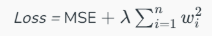

    'λ' is the regularization parameter that controls the strength of the penalty, and wi are the coefficients.

* Coefficients become as small as possible but not zero, so that no feature dominate the other.
* In this regression all features are considered.
* The larger the ' λ ' value, the stronger the regularization, and the smaller the coefficients will become.

**(d) Run logistic regression on the data using L2 regularization, varying the regularization parameter
λ ∈ {0, 0.1, 1, 10, 100, 1000}. Plot on one graph the average cross-entropy for the training data
and the testing data (averaged over all instances), as a function of λ (you should use a log scale
for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on the third
graph the actual values of the weights obtained (one curve per weight). Finally, plot on a
graph the accuracy on the training and test set. Explain briefly what you see.**

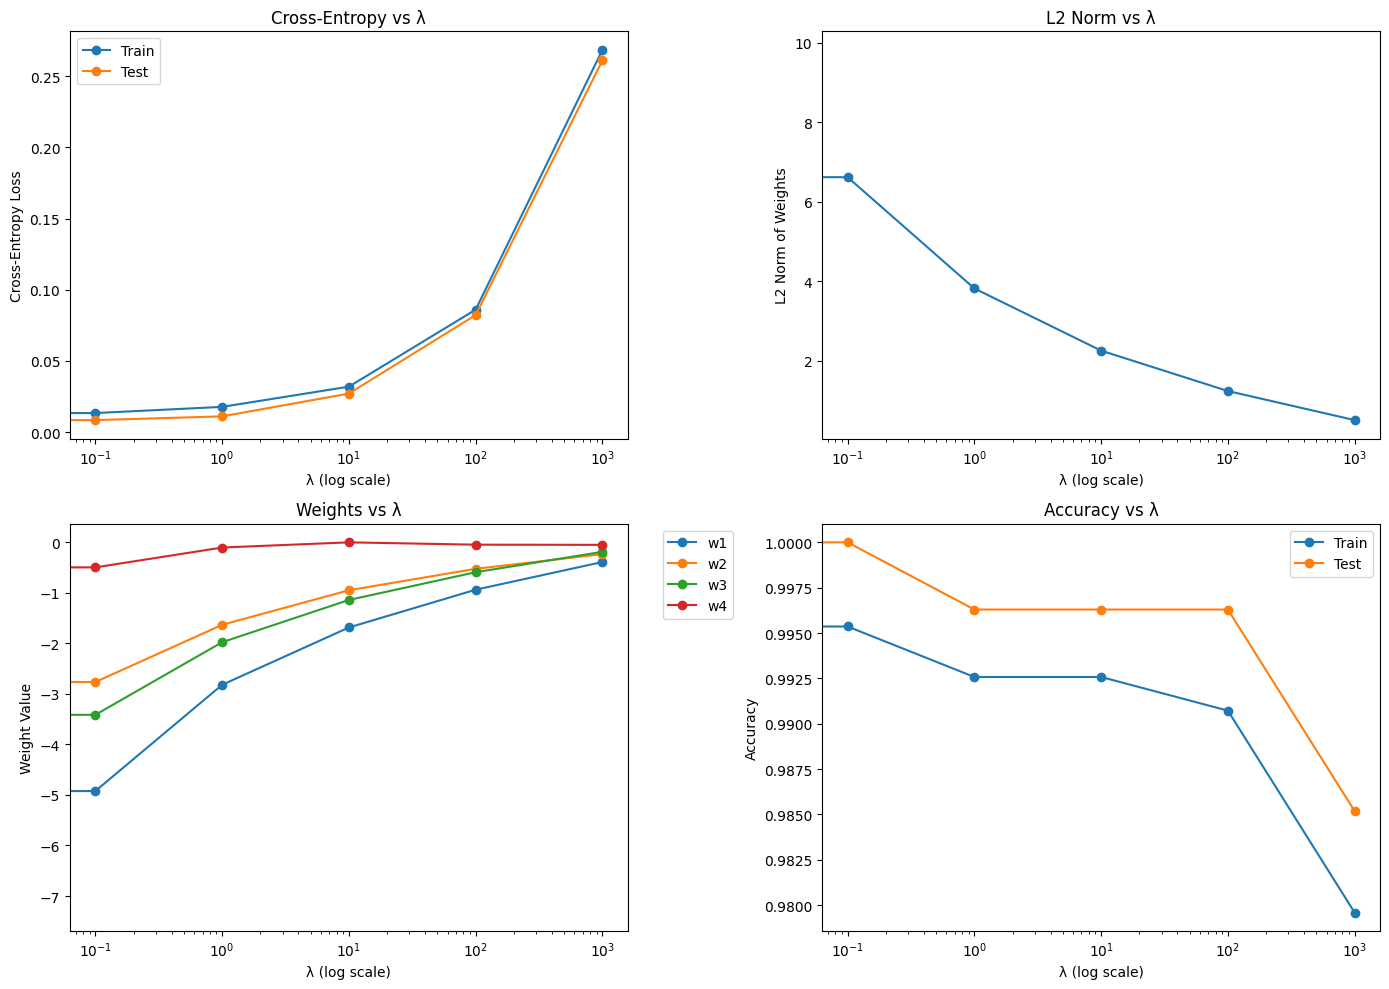

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

# Defining lambda values
lambda_values = [0, 0.1, 1, 10, 100, 1000]

# to store results
train_loss = []
test_loss = []
train_acc = []
test_acc = []
l2_norms = []
weights_list = []

for lam in lambda_values:
    if lam == 0:
        C = 1e10
    else:
        C = 1 / lam

    model = LogisticRegression(C=C, penalty='l2', solver='lbfgs', max_iter=1000)
    model.fit(X_train, y_train)

    y_train_pred_prob = model.predict_proba(X_train)[:, 1]
    y_test_pred_prob = model.predict_proba(X_test)[:, 1]
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_loss.append(log_loss(y_train, y_train_pred_prob))
    test_loss.append(log_loss(y_test, y_test_pred_prob))

    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

    weights = model.coef_.flatten()
    l2_norms.append(np.linalg.norm(weights))
    weights_list.append(weights)

weights_array = np.array(weights_list)

plt.figure(figsize=(14, 10))

# 1. Cross-entropy vs λ
plt.subplot(2, 2, 1)
plt.plot(lambda_values, train_loss, marker='o', label='Train')
plt.plot(lambda_values, test_loss, marker='o', label='Test')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('Cross-Entropy Loss')
plt.title('Cross-Entropy vs λ')
plt.legend()

# 2. L2 norm vs λ
plt.subplot(2, 2, 2)
plt.plot(lambda_values, l2_norms, marker='o')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('L2 Norm of Weights')
plt.title('L2 Norm vs λ')

# 3. Weight values vs λ
plt.subplot(2, 2, 3)
for i in range(weights_array.shape[1]):
    plt.plot(lambda_values, weights_array[:, i], marker='o', label=f'w{i+1}')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('Weight Value')
plt.title('Weights vs λ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 4. Accuracy vs λ
plt.subplot(2, 2, 4)
plt.plot(lambda_values, train_acc, marker='o', label='Train')
plt.plot(lambda_values, test_acc, marker='o', label='Test')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs λ')
plt.legend()

plt.tight_layout()
plt.show()


Observations:
1. Cross-Entropy vs λ
    * When λ is small (less regularization) → Cross-entropy loss is very low (almost zero) for both train and test → The model fits well..
    * When λ becomes large → Loss increases significantly → Model becomes too simple (underfitting).

2. L2 Norm of Weights vs λ
    * As λ increases, the L2 norm of weights decreases → Stronger regularization shrinks weights toward zero.

3. Weights vs λ (Bottom-Right)
    * Each weight curve moves toward zero as λ increases.
    * With no regularization (λ = 0), weights have large magnitude → Model complexity is high.
    * With strong regularization, all weights shrink → Model becomes less flexible.
4. Accuracy Vs λ
    * Accuracy is highest when λ is small (0.1, 1).
    * Accuracy drops when λ becomes very large (100, 1000) because the model underfits.

**(e) Re-format the data in the following way: take each of the input variables, and feed it through
a set of Gaussian basis functions, defined as follows. For each variable (except the bias term),
use 5 univariate basis functions with means evenly spaced between -10 and 10 and variance σ.
You will experiment with σ values of 0.1, 0.5, 1, 5 and 10.**

In [21]:
import numpy as np

num_features = X.shape[1]
centers = np.linspace(-10, 10, 5)
sigma_values = [0.1, 0.5, 1, 5, 10]

def gaussian_basis_transform(X, sigma):
    if isinstance(X, pd.DataFrame):
        X = X.values

    m = X.shape[0]
    transformed = []
    for j in range(num_features):
        xj = X[:, j].reshape(-1, 1)
        for mu in centers:
            phi = np.exp(- (xj - mu) ** 2 / (2 * sigma ** 2))
            transformed.append(phi)
    return np.hstack(transformed)

for sigma in sigma_values:
    X_transformed = gaussian_basis_transform(X, sigma)
    print(f"New shape for sigma={sigma}:", X_transformed.shape)


New shape for sigma=0.1: (1348, 20)
New shape for sigma=0.5: (1348, 20)
New shape for sigma=1: (1348, 20)
New shape for sigma=5: (1348, 20)
New shape for sigma=10: (1348, 20)


**(f) Using no regularization and doing regression with this new set of basis functions, plot the
training and testing error as a function of σ (when using only basis functions of a given σ). Add
constant lines showing the training and testing error you had obtained in part c. Explain how σ
influences overfitting and the bias-variance trade-off.**

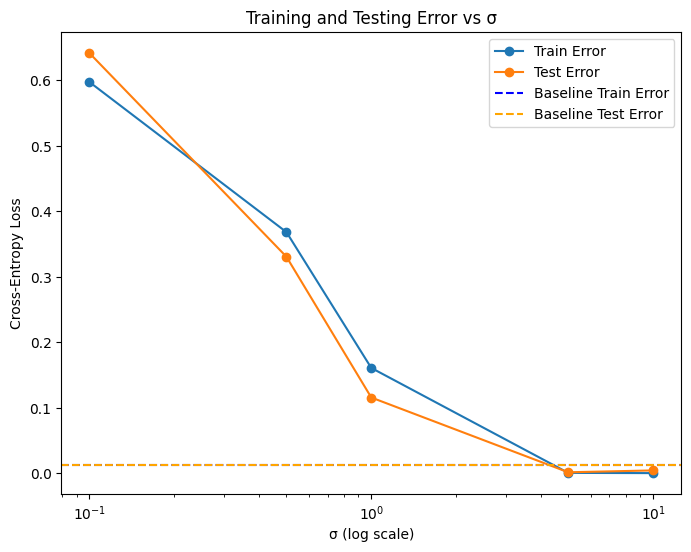

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

train_errors = []
test_errors = []

for sigma in sigma_values:

    X_train_trans = gaussian_basis_transform(X_train, sigma)
    X_test_trans = gaussian_basis_transform(X_test, sigma)

    model = LogisticRegression(C=1e10, penalty='l2', solver='lbfgs', max_iter=1000)
    model.fit(X_train_trans, y_train)

    y_train_pred_prob = model.predict_proba(X_train_trans)[:, 1]
    y_test_pred_prob = model.predict_proba(X_test_trans)[:, 1]

    train_error = log_loss(y_train, y_train_pred_prob)
    test_error = log_loss(y_test, y_test_pred_prob)

    train_errors.append(train_error)
    test_errors.append(test_error)

baseline_train_error = train_loss[0]  # for λ = 0
baseline_test_error = test_loss[0]

plt.figure(figsize=(8, 6))
plt.plot(sigma_values, train_errors, marker='o', label='Train Error')
plt.plot(sigma_values, test_errors, marker='o', label='Test Error')
plt.axhline(y=baseline_train_error, color='blue', linestyle='--', label='Baseline Train Error')
plt.axhline(y=baseline_test_error, color='orange', linestyle='--', label='Baseline Test Error')
plt.xscale('log')
plt.xlabel('σ (log scale)')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training and Testing Error vs σ')
plt.legend()
plt.show()


* Small σ makes Gaussian functions very narrow, so the model becomes very complex and overfits.
* Large σ makes them wide, so the model becomes too simple and underfits.
* Small σ → Low bias, High variance (complex model).
* Large σ → High bias, Low variance (simple model).
* A medium σ gives the best balance. This is the bias-variance trade-off.

**(g) Add in all the basis function and perform regularized regression with the regularization
parameter λ ∈ {0, 0.1, 1, 10, 100, 1000, 10000}. Plot on one graph the average cross- entropy
error for the training data and the testing data, as a function of λ (you should use a log scale
for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on a different
graph the L2 norm of the weights for the set of basis functions corresponding to each value
of σ, as a function of λ (this will be a graph with 5 lines on it). Explain briefly the results.**

Total features: 100 Group features: 20


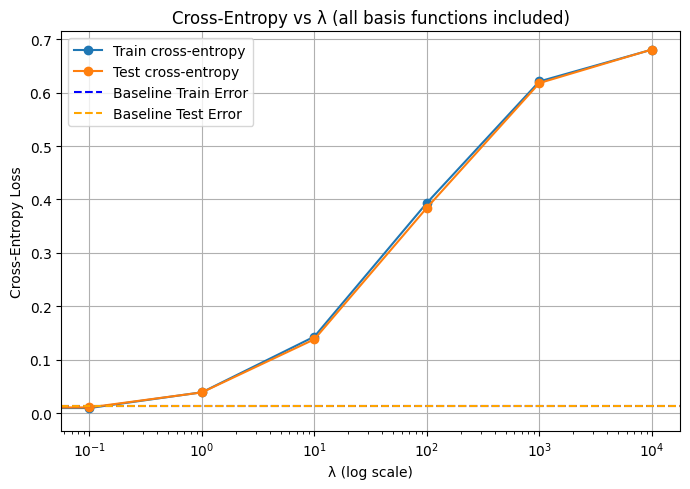

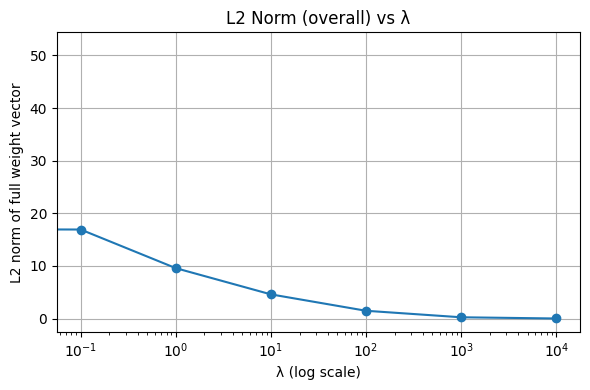

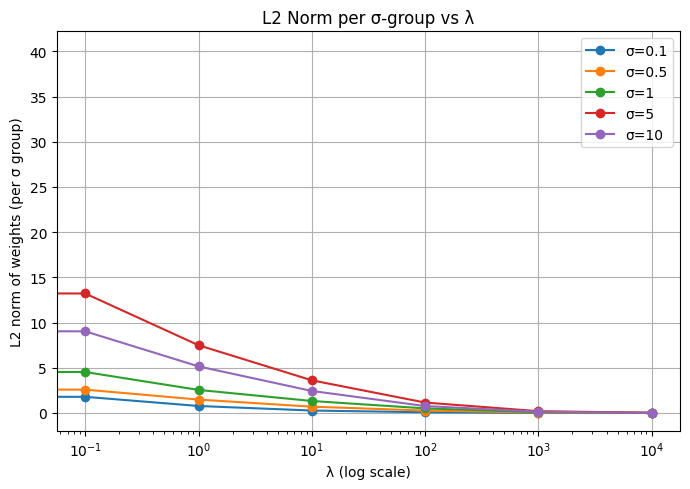

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import pandas as pd

# Define sigma and lambda values
sigma_values = [0.1, 0.5, 1, 5, 10]
lambda_values = [0, 0.1, 1, 10, 100, 1000, 10000]
C_for_lambda = lambda lam: 1e10 if lam == 0 else 1.0 / lam

# Gaussian basis expansion
def gaussian_basis_transform(X, sigma, centers=np.linspace(-10, 10, 5)):
    if isinstance(X, pd.DataFrame):
        X = X.values
    m, num_features = X.shape
    transformed = []
    for j in range(num_features):
        xj = X[:, j].reshape(-1, 1)
        for mu in centers:
            phi = np.exp(- (xj - mu) ** 2 / (2 * sigma ** 2))
            transformed.append(phi)
    return np.hstack(transformed)

# Transform datasets for each sigma
X_train_groups = []
X_test_groups = []
for sigma in sigma_values:
    X_train_groups.append(gaussian_basis_transform(X_train, sigma))
    X_test_groups.append(gaussian_basis_transform(X_test, sigma))

# Combine features
X_train_all = np.hstack(X_train_groups)
X_test_all  = np.hstack(X_test_groups)

n_total_features = X_train_all.shape[1]
n_group_features = X_train_groups[0].shape[1]

print("Total features:", n_total_features, "Group features:", n_group_features)

# Baseline errors (if not set)
try:
    baseline_train_error
    baseline_test_error
except NameError:
    baseline_train_error = None
    baseline_test_error = None

# Storage
train_losses = []
test_losses  = []
l2_norms_overall = []
l2_norms_per_sigma = []

# Loop over λ values
for lam in lambda_values:
    C = C_for_lambda(lam)
    model = LogisticRegression(
        penalty='l2', C=C, solver='lbfgs', max_iter=10000
    )
    model.fit(X_train_all, y_train)

    # Cross-entropy losses
    y_train_prob = model.predict_proba(X_train_all)[:, 1]
    y_test_prob  = model.predict_proba(X_test_all)[:, 1]

    train_losses.append(log_loss(y_train, y_train_prob))
    test_losses.append(log_loss(y_test, y_test_prob))

    # L2 norms
    w = model.coef_.ravel()
    l2_norms_overall.append(np.linalg.norm(w))

    # Per-σ group norms
    group_norms = []
    for i in range(len(sigma_values)):
        start = i * n_group_features
        end   = (i + 1) * n_group_features
        wi = w[start:end]
        group_norms.append(np.linalg.norm(wi))
    l2_norms_per_sigma.append(group_norms)

l2_norms_per_sigma = np.array(l2_norms_per_sigma)

# --- PLOT 1: Cross-entropy vs λ ---
plt.figure(figsize=(7,5))
plt.plot(lambda_values, train_losses, marker='o', label='Train cross-entropy')
plt.plot(lambda_values, test_losses, marker='o', label='Test cross-entropy')
if baseline_train_error is not None:
    plt.axhline(y=baseline_train_error, color='blue', linestyle='--', label='Baseline Train Error')
if baseline_test_error is not None:
    plt.axhline(y=baseline_test_error, color='orange', linestyle='--', label='Baseline Test Error')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('Cross-Entropy Loss')
plt.title('Cross-Entropy vs λ (all basis functions included)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- PLOT 2: Overall L2 norm vs λ ---
plt.figure(figsize=(6,4))
plt.plot(lambda_values, l2_norms_overall, marker='o')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('L2 norm of full weight vector')
plt.title('L2 Norm (overall) vs λ')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- PLOT 3: L2 norm per σ-group vs λ ---
plt.figure(figsize=(7,5))
for i, sigma in enumerate(sigma_values):
    plt.plot(lambda_values, l2_norms_per_sigma[:, i], marker='o', label=f'σ={sigma}')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('L2 norm of weights (per σ group)')
plt.title('L2 Norm per σ-group vs λ')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


1. Cross-Entropy vs λ
    * When λ = 0 (no regularization), training error is low, but test error is slightly higher → some overfitting.
    * As λ increases, both training and test error increase → the model becomes too simple (underfits).
2. L2 Norm (overall) vs λ
    * L2 norm of the full weight vector decreases sharply as λ increases.
3. L2 Norm per σ-group vs λ
    * For small λ, groups with larger σ (e.g., σ=10) have larger weight norms → the model relies more on smoother, wide Gaussians.
    * As λ increases, all groups shrink toward zero, but large-σ groups shrink slower initially because they are more stable and less prone to overfitting

**(h) Explain what you would need to do if you wanted to design a set of Gaussian basis functions
that capture relationships between the inputs. Explain the impact of this choice on the bias-variance trade-off. No experiments are needed (although you are welcome to explore
this on your own)**

If we want Gaussian basis functions to capture relationships between inputs (not just each input separately), you need to use multidimensional Gaussians. That means instead of having basis functions centered on single features, you define them in the full input space, where each basis function depends on multiple inputs together.

* What changes?

  * Each basis function now has a center vector (for all features) and possibly a covariance matrix to control its shape in multiple dimensions.
  * You will need many more basis functions to cover the input space properly.

* Impact on bias-variance:

  * It reduces bias because the model can learn complex interactions between features.
  * But it increases variance (risk of overfitting) because the model becomes more flexible and needs more data to fit reliably.
  * Regularization becomes even more important to control complexity.



**(i) Suppose that instead of wanting to use a fixed set of evenly-spaced basis functions, you would
like to adapt the placement of these functions. Derive a learning algorithm that computes
both the placement of the basis function, µi and the weight vector w from data (assuming
that the width σ isfixed. You should still allow for L2 regularization of the weight vector.
Note that your algorithm will need to be iterative.**

In [28]:
import numpy as np

def gaussian_basis(X, mus, sigma):
    n_samples = X.shape[0]
    n_basis = mus.shape[0]
    Phi = np.zeros((n_samples, n_basis))
    for i in range(n_basis):
        diff = X - mus[i]
        Phi[:, i] = np.exp(-np.sum(diff ** 2, axis=1) / (2 * sigma ** 2))
    return Phi

def compute_weights(Phi, y, lam):
    A = Phi.T @ Phi + lam * np.eye(Phi.shape[1])
    b = Phi.T @ y
    return np.linalg.solve(A, b)

def gradient_mu(X, y, mus, w, sigma):
    n_basis = mus.shape[0]
    grad = np.zeros_like(mus)
    Phi = gaussian_basis(X, mus, sigma)
    error = Phi @ w - y
    for i in range(n_basis):
        diff = X - mus[i]
        grad[i] = np.sum((error * w[i])[:, None] * Phi[:, i][:, None] * diff / (sigma ** 2), axis=0)
    return grad

def learn_gaussian_centers(X, y, n_basis=5, sigma=1.0, lam=0.1, lr=0.01, max_iter=100):

    mus = X[np.random.choice(X.shape[0], n_basis, replace=False)]

    for iteration in range(max_iter):
        Phi = gaussian_basis(X, mus, sigma)
        w = compute_weights(Phi, y, lam)
        grad = gradient_mu(X, y, mus, w, sigma)
        mus -= lr * grad
        loss = np.mean((Phi @ w - y) ** 2)
        if iteration % 10 == 0:
            print(f"Iteration {iteration}, Loss: {loss:.4f}")
    return mus, w

np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = np.sin(X).ravel()
sigma = 1.0
mus, w = learn_gaussian_centers(X, y, n_basis=5, sigma=sigma, lam=0.1, lr=0.01, max_iter=100)
print("Learned centers:", mus)
print("Learned weights:", w)


Iteration 0, Loss: 0.2092
Iteration 10, Loss: 0.1661
Iteration 20, Loss: 0.0996
Iteration 30, Loss: 0.0413
Iteration 40, Loss: 0.0222
Iteration 50, Loss: 0.0160
Iteration 60, Loss: 0.0133
Iteration 70, Loss: 0.0120
Iteration 80, Loss: 0.0113
Iteration 90, Loss: 0.0109
Learned centers: [[7.69418595]
 [0.52476683]
 [1.26709043]
 [4.68521473]
 [2.42481909]]
Learned weights: [ 0.96490871 -0.40537196  1.1415791  -1.0705076   0.21008622]


**(j) Does your algorithm converge? If so, does it obtain a locally or globally optimal solution?
Explain your answer.**

Yes, the algorithm converges, but only to a local optimum, not the global one.

Reason:

* When weights w are fixed, finding w is convex --> easy.

* But updating centers μi makes the problem non-convex, so many local minima exist.

The above result shows the loss decreasing and stabilizing --> algorithm converged to a local solution, which depends on starting points.

Global optimum is not guaranteed.

[link text](https://)**2. Experiment on insurance dataset to demonstrate the Linear Regression and its versions, along with complete data preprocessing steps.**

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [55]:
df=pd.read_csv('/content/drive/MyDrive/ML/insurance.csv')
df.shape

(1338, 7)

In [56]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [57]:
# Check dataset info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

In [58]:
[col for col in df.columns if df[col].isnull().sum()>0] #check if there is null data

[]

In [59]:
df=df.drop_duplicates()

In [60]:
df.shape

(1337, 7)

In [61]:
df = pd.get_dummies(df, drop_first=True)

In [63]:
X = df.drop('charges', axis=1)
y = df['charges']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function for evaluation
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return {'Model': name, 'R2': r2, 'RMSE': rmse, 'MAE': mae}

In [67]:
results = []

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
results.append(evaluate_model('Linear Regression', y_test, y_pred_lr))

In [68]:
# Ridge Regression
ridge = Ridge(alpha=10)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
results.append(evaluate_model('Ridge Regression', y_test, y_pred_ridge))

In [69]:
# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
results.append(evaluate_model('Lasso Regression', y_test, y_pred_lasso))

In [70]:
# 10. Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)
y_pred_poly = poly_lr.predict(X_test_poly)
results.append(evaluate_model('Polynomial Regression (deg=2)', y_test, y_pred_poly))

In [71]:
# Results in DataFrame
results_df = pd.DataFrame(results)
print(results_df)

                           Model        R2         RMSE          MAE
0              Linear Regression  0.806929  5956.342894  4177.045561
1               Ridge Regression  0.805019  5985.729537  4202.575787
2               Lasso Regression  0.806928  5956.349043  4177.047248
3  Polynomial Regression (deg=2)  0.882530  4646.056793  2867.317439


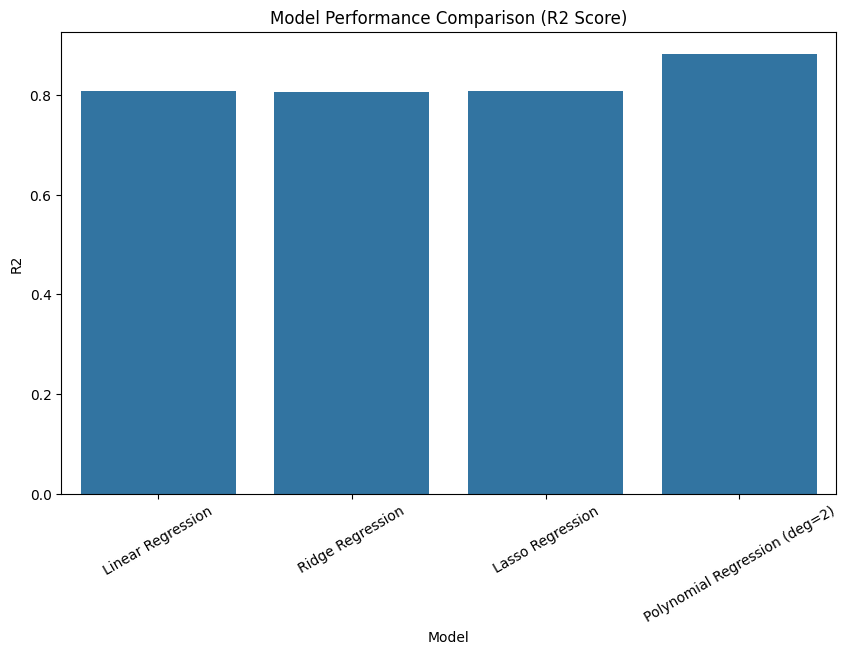

In [72]:
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='R2', data=results_df)
plt.title('Model Performance Comparison (R2 Score)')
plt.xticks(rotation=30)
plt.show()

 **3. Experiment on Heart disease datasets to demonstrate the Logistic Regression (Classification), along with complete data preprocessing steps.**

> Add blockquote



In [100]:
df = pd.read_csv('/content/drive/MyDrive/ML/winequality-white.csv')
df.shape

(4898, 1)

In [101]:
df.shape
df.dtypes



,0
"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality""",object


In [102]:
[col for col in df.columns if df[col].isnull().sum() > 0]


[]

In [106]:
print(df.columns)


Index(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'], dtype='object')


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [111]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [112]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7704918032786885

Confusion Matrix:
 [[21 11]
 [ 3 26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.66      0.75        32
           1       0.70      0.90      0.79        29

    accuracy                           0.77        61
   macro avg       0.79      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61



In [113]:
# Check Probability Predictions
y_prob = model.predict_proba(X_test)[:,1]

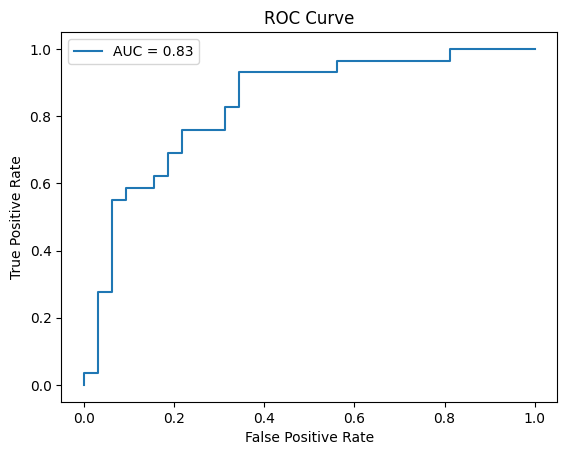

In [114]:
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label='AUC = %.2f' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
